# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here


In [3]:
def my_dice():
    from random import choice
    dice=list(range(1,7))
    roll=[]
    for i in range(10):
        roll.append(choice(dice))
    
    return pd.DataFrame({"roll":roll})



In [4]:
df=my_dice()
df

,roll
0,6
1,6
2,6
3,2
4,2
5,4
6,6
7,3
8,1
9,3


#### 2.- Plot the results sorted by value.

In [5]:
# your code here
df.sort_values(by='roll',inplace=True)
df

,roll
8,1
3,2
4,2
7,3
9,3
5,4
0,6
1,6
2,6
6,6


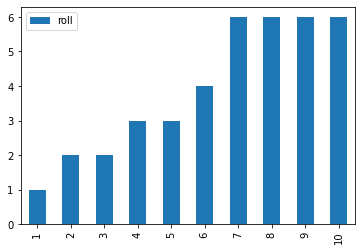

In [6]:
df.plot(kind='bar')
plt.xticks(np.arange(10),[1,2,3,4,5,6,7,8,9,10])

plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [7]:
freq=pd.DataFrame({'freq':df.value_counts()})

In [8]:
freq

,freq
roll,
6,4
2,2
3,2
1,1
4,1


In [9]:
# your code here
freq.sort_index(inplace=True)

In [10]:
freq2=freq.reset_index()

In [11]:
freq2

,roll,freq
0,1,1
1,2,2
2,3,2
3,4,1
4,6,4


<AxesSubplot:xlabel='roll', ylabel='freq'>

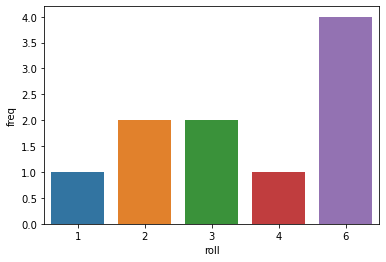

In [12]:
sns.barplot(data=freq2,x='roll',y='freq')

In [13]:
"""
your comments here
The variable being random, no particular observation can be made on the visualisation
"""

'\nyour comments here\nThe variable being random, no particular observation can be made on the visualisation\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [14]:
# your code here
#if computed based on frequency distribution
def compute_mean(turns,values):
    
    total=0
    for i in range(len(values)):
        total+=turns[i]*values[i]
    
    m=total/values.sum()
    return m
    

In [15]:
#based on simple observations
def compute_mean2(values):
    m=values.sum()/values.count()
    return m

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [16]:
compute_mean(freq2['roll'],freq2['freq'])

3.9

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [17]:
# your code here
def compute_median(turns,values):
    obs=str()
    turns=turns.astype(str)
    for i in range(len(values)):
        obs+=turns[i]*values[i]
    
    obs=list(obs).sort()
    
    return obs

In [18]:
liste=compute_median(freq2['roll'],freq2['freq'])

In [19]:
print(liste)

None


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [20]:
# your code here

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [21]:
# your code here
df=pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\Labs\DAFT_212\module_2\Lab_4_Descriptive-Statistics\roll_the_dice_hundred.csv')

In [22]:
df.sort_values(by='value',inplace=True)


<AxesSubplot:>

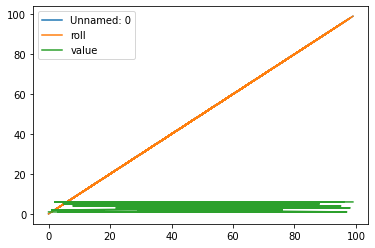

In [23]:
df.plot()

In [24]:
"""
"At least the first column after index is unnecessarry, and the plot is useless"
"""

'\n"At least the first column after index is unnecessarry, and the plot is useless"\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [25]:
compute_mean(df['value'],df['roll'])

3.7248484848484846

In [26]:
# your code here
compute_mean2(df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [27]:
df['count']=1

In [28]:
df

,Unnamed: 0,roll,value,count
0,0,0,1,1
47,47,47,1,1
56,56,56,1,1
9,9,9,1,1
73,73,73,1,1
...,...,...,...,...
17,17,17,6,1
11,11,11,6,1
24,24,24,6,1
21,21,21,6,1


In [29]:
df2=df[["value","count"]].groupby('value').agg('sum')

In [30]:
df2.reset_index(inplace=True)

In [31]:
df2

,value,count
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [32]:
df2.set_index('value',inplace=True)

In [34]:
df2

,count
value,
1,12
2,17
3,14
4,22
5,12
6,23


<AxesSubplot:xlabel='value'>

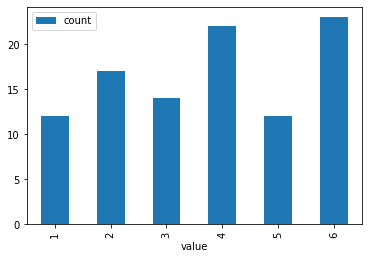

In [41]:
# your code here
df2.plot.bar()
#plt.xticks()

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [42]:
# your code here
df=pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\Labs\DAFT_212\module_2\Lab_4_Descriptive-Statistics\roll_the_dice_thousand.csv')

In [46]:
df.drop(columns='Unnamed: 0',inplace=True)

In [53]:
df['count']=1

In [55]:
df2=df[["value","count"]].groupby('value').agg('sum')

In [56]:
df2

,count
value,
1,175
2,167
3,175
4,168
5,149
6,166


<AxesSubplot:xlabel='value'>

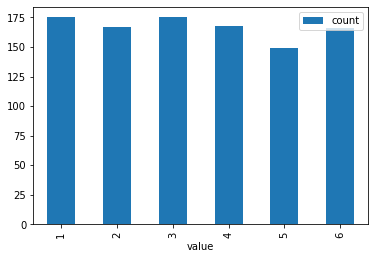

In [57]:
df2.plot.bar()

In [ ]:
"""
The more we toss the dice, the more the values appear normally distributed
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [58]:
# your code here
df=pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\Labs\DAFT_212\module_2\Lab_4_Descriptive-Statistics\ages_population.csv')

In [62]:
df

,observation,count
0,68.0,1
1,12.0,1
2,45.0,1
3,38.0,1
4,49.0,1
...,...,...
995,27.0,1
996,47.0,1
997,53.0,1
998,33.0,1


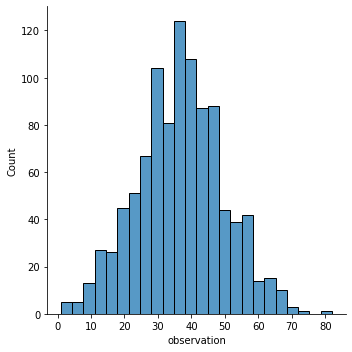

In [85]:
sns.displot(df['observation'])

In [ ]:
"""I assume the mean will be somewhere arount 38 and the sdev about 10"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [86]:
# your code here
df.observation.mean()

36.56

In [89]:
df.observation.std()

12.816499625976762

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [90]:
# your code here
df=pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\Labs\DAFT_212\module_2\Lab_4_Descriptive-Statistics\ages_population2.csv')

In [91]:
df

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


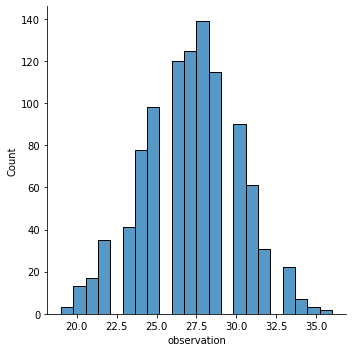

In [92]:
sns.displot(df['observation'])

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
I see age gaps but the distribution looks similar.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [93]:
# your code here
df.observation.mean()

27.155

In [94]:
df.observation.std()

2.969813932689186

In [ ]:
"""
your comments here
more specific sample.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [95]:
# your code here
df=pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\Labs\DAFT_212\module_2\Lab_4_Descriptive-Statistics\ages_population3.csv')

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='observation', ylabel='Density'>

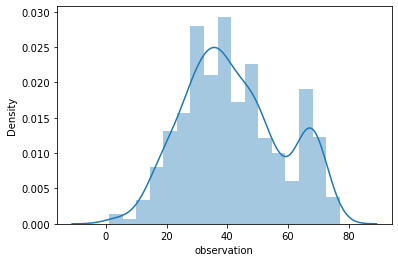

In [97]:
sns.distplot(df['observation'])

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [98]:
# your code here
df['observation'].mean()

41.989

In [99]:
df['observation'].std()

16.144705959865934

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [100]:
# your code here
df.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""